## Introduction to SpaCy

https://spacy.io/

In [ ]:
# !pip install prettytable
# pip install -U pip setuptools wheel
# pip install -U spacy
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg


spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text.

It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

### SpaCy Features

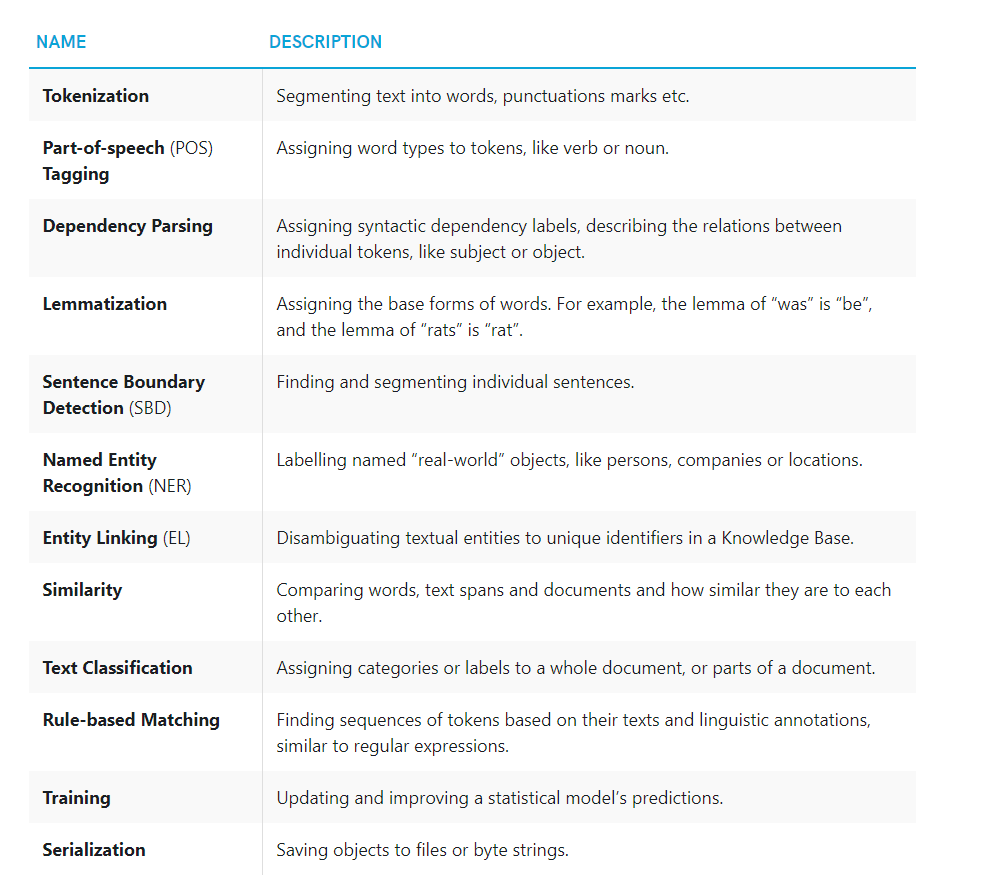

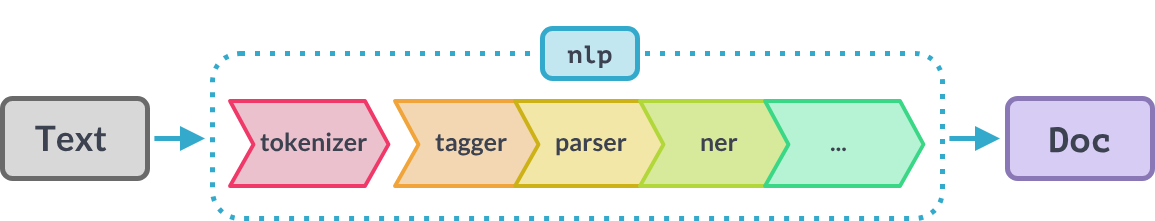

### 1. **Tokenization**


In [1]:
import spacy
from prettytable import PrettyTable

In [2]:
nlp = spacy.load('en_core_web_sm')

In [13]:
text = "Hello KGP Talkie! Let's learn NLP together. I am 24."

doc = nlp(text)

In [18]:
# doc.to_dict()
for token in doc:
    print(token.text, token.is_alpha, token.is_punct, token.like_num)


Hello True False False
KGP True False False
Talkie True False False
! False True False
Let True False False
's False False False
learn True False False
NLP True False False
together True False False
. False True False
I True False False
am True False False
24 False False True
. False True False


In [21]:
table = PrettyTable()
table.field_names = ['token', 'is alpha', 'is punct', 'is number', 'is space']
for token in doc:
    # print(token.text, token.is_alpha, token.is_punct, token.like_num)
    table.add_row([token.text, token.is_alpha, token.is_punct, token.like_num, token.is_space])  

print(table)



+----------+----------+----------+-----------+----------+
|  token   | is alpha | is punct | is number | is space |
+----------+----------+----------+-----------+----------+
|  Hello   |   True   |  False   |   False   |  False   |
|   KGP    |   True   |  False   |   False   |  False   |
|  Talkie  |   True   |  False   |   False   |  False   |
|    !     |  False   |   True   |   False   |  False   |
|   Let    |   True   |  False   |   False   |  False   |
|    's    |  False   |  False   |   False   |  False   |
|  learn   |   True   |  False   |   False   |  False   |
|   NLP    |   True   |  False   |   False   |  False   |
| together |   True   |  False   |   False   |  False   |
|    .     |  False   |   True   |   False   |  False   |
|    I     |   True   |  False   |   False   |  False   |
|    am    |   True   |  False   |   False   |  False   |
|    24    |  False   |  False   |    True   |  False   |
|    .     |  False   |   True   |   False   |  False   |
+----------+--

### 2. **Part-of-Speech (POS) Tagging**

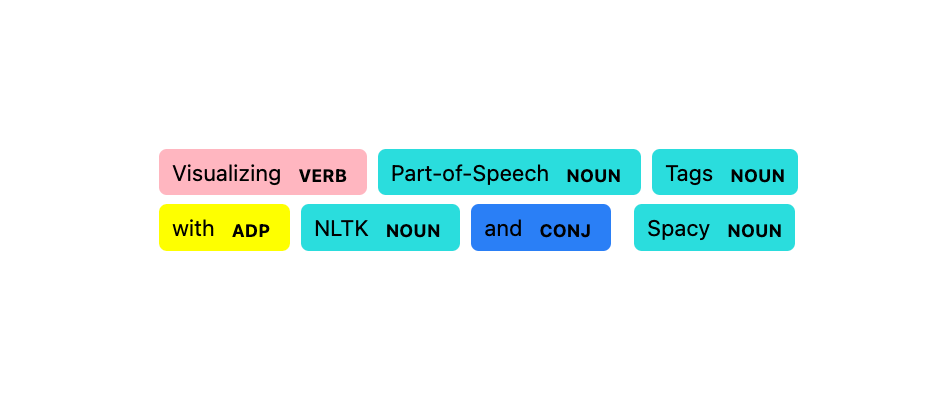

https://universaldependencies.org/u/pos/

**Part of speech** or **POS** is a grammatical role that explains how a particular word is used in a sentence. There are typically eight parts of speech:

- Noun
- Pronoun
- Adjective
- Verb
- Adverb
- Preposition
- Conjunction
- Interjection

#### Why POS Tagging is important?

POS (Part-of-Speech) tagging is important for the following reasons:

1. **Understanding Sentence Structure**: POS tagging helps identify the grammatical structure of a sentence by categorizing words into their respective parts of speech (nouns, verbs, adjectives, etc.). This understanding is crucial for tasks like syntactic parsing, where the relationship between words is analyzed.

2. **Enhancing NLP Tasks**: Many NLP tasks, such as named entity recognition (NER), text classification, and machine translation, benefit from POS tagging. It provides additional context that can improve the accuracy and performance of these models.

3. **Word Sense Disambiguation**: POS tagging aids in word sense disambiguation by providing context about a word’s role in a sentence, helping distinguish between different meanings of a word depending on its part of speech.

In [22]:
doc

Hello KGP Talkie! Let's learn NLP together. I am 24.

In [25]:
table = PrettyTable()
table.field_names = ['token', 'pos', 'details', 'explanation']

for token in doc:
    table.add_row([token.text, token.pos_, token.tag_, spacy.explain(token.tag_)])

print(table)

+----------+-------+---------+---------------------------------------+
|  token   |  pos  | details |              explanation              |
+----------+-------+---------+---------------------------------------+
|  Hello   |  INTJ |    UH   |              interjection             |
|   KGP    | PROPN |   NNP   |         noun, proper singular         |
|  Talkie  | PROPN |   NNP   |         noun, proper singular         |
|    !     | PUNCT |    .    |   punctuation mark, sentence closer   |
|   Let    |  VERB |    VB   |            verb, base form            |
|    's    |  PRON |   PRP   |           pronoun, personal           |
|  learn   |  VERB |    VB   |            verb, base form            |
|   NLP    | PROPN |   NNP   |         noun, proper singular         |
| together |  ADV  |    RB   |                 adverb                |
|    .     | PUNCT |    .    |   punctuation mark, sentence closer   |
|    I     |  PRON |   PRP   |           pronoun, personal           |
|    a

In [24]:
token.pos_

'PUNCT'

### 3. **Dependency Parsing**


https://universaldependencies.org/docs/en/dep/

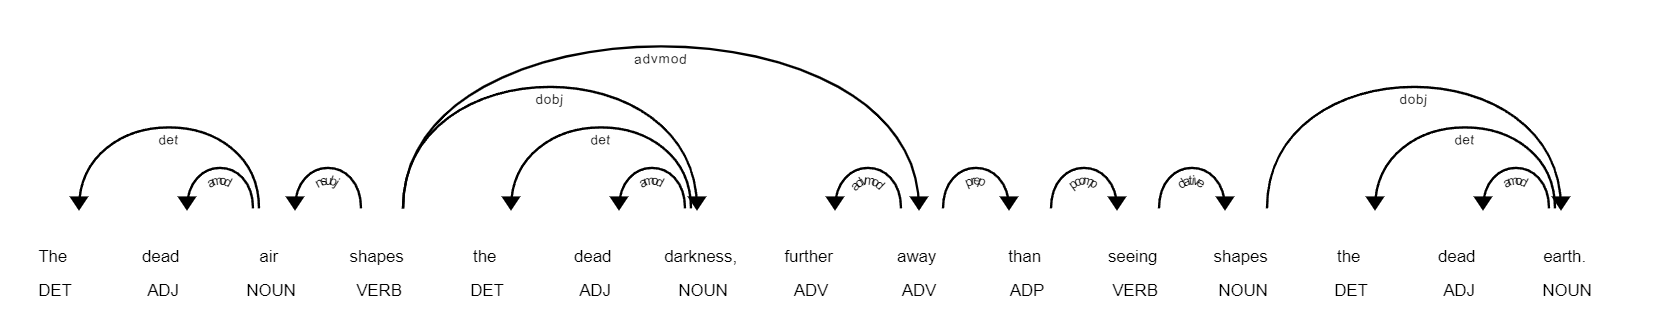

Dependency parsing is important for the following reasons:

1. **Captures Syntactic Relationships**: It reveals the direct syntactic relationships between words in a sentence, helping to understand how words are connected and how they function together to convey meaning.

2. **Enhances NLP Applications**: Dependency parsing improves the performance of NLP tasks such as machine translation, sentiment analysis, and information extraction by providing a detailed structure of sentence components.

3. **Supports Language Understanding**: It aids in comprehending complex sentences, especially in languages with flexible word order, by identifying the hierarchical structure and dependencies, leading to more accurate language models.

#### How Dependency Parsing is Different from PoS Tagging?

1. **Focus on Relationships vs. Word Categories**: Dependency parsing focuses on the relationships and dependencies between words in a sentence, showing how they are connected, while POS tagging categorizes each word individually based on its part of speech (e.g., noun, verb, adjective).

2. **Hierarchical Structure vs. Flat Labeling**: Dependency parsing provides a hierarchical structure of the sentence, revealing the grammatical roles and connections between words, whereas POS tagging offers a flat labeling of words without indicating how they relate to each other in the sentence.

In [28]:
text = 'The dead air shaped the dead darkness, further away than seeing shapes the dead earth.'
doc = nlp(text)

table = PrettyTable()
table.field_names = ['token','dep', 'head text', 'head pos', 'children']

for token in doc:
    children = [child.text for child in token.children]
    table.add_row([token.text, token.dep_, token.head.text, token.head.pos_, children])

print(table)

+----------+--------+-----------+----------+---------------------------------------+
|  token   |  dep   | head text | head pos |                children               |
+----------+--------+-----------+----------+---------------------------------------+
|   The    |  det   |    air    |   NOUN   |                   []                  |
|   dead   |  amod  |    air    |   NOUN   |                   []                  |
|   air    | nsubj  |   shaped  |   VERB   |            ['The', 'dead']            |
|  shaped  |  ROOT  |   shaped  |   VERB   | ['air', 'darkness', ',', 'away', '.'] |
|   the    |  det   |  darkness |   NOUN   |                   []                  |
|   dead   |  amod  |  darkness |   NOUN   |                   []                  |
| darkness |  dobj  |   shaped  |   VERB   |            ['the', 'dead']            |
|    ,     | punct  |   shaped  |   VERB   |                   []                  |
| further  | advmod |    away   |   ADV    |                   []

In [29]:
from spacy import displacy

In [33]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [44]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120, 'compact': True, 'bg': '#09a3d3', 'color': '#ffffff'})

### 4. **Lemmatization**


1. **Base Form Reduction**: Lemmatization reduces words to their meaningful base form (e.g., "running" to "run").

2. **Enhances NLP Accuracy**: It normalizes word variations, improving the accuracy of NLP tasks by treating different word forms as the same.

In [46]:
text = 'run ran running'

doc = nlp(text)

table = PrettyTable(field_names=['token', 'lemma'])
for token in doc:
    table.add_row([token.text, token.lemma_])

print(table)

+---------+-------+
|  token  | lemma |
+---------+-------+
|   run   |  run  |
|   ran   |  run  |
| running |  run  |
+---------+-------+


In [49]:
text = 'The scientists discover new species every year, Last year, they discovered an ancient artifact. They are discovering new techniques with their recent discovery'

doc = nlp(text)

table = PrettyTable(field_names=['token', 'lemma', 'pos'])
for token in doc:
    table.add_row([token.text, token.lemma_, token.pos_])

print(table)

+-------------+-----------+-------+
|    token    |   lemma   |  pos  |
+-------------+-----------+-------+
|     The     |    the    |  DET  |
|  scientists | scientist |  NOUN |
|   discover  |  discover |  VERB |
|     new     |    new    |  ADJ  |
|   species   |   specie  |  NOUN |
|    every    |   every   |  DET  |
|     year    |    year   |  NOUN |
|      ,      |     ,     | PUNCT |
|     Last    |    last   |  ADJ  |
|     year    |    year   |  NOUN |
|      ,      |     ,     | PUNCT |
|     they    |    they   |  PRON |
|  discovered |  discover |  VERB |
|      an     |     an    |  DET  |
|   ancient   |  ancient  |  ADJ  |
|   artifact  |  artifact |  NOUN |
|      .      |     .     | PUNCT |
|     They    |    they   |  PRON |
|     are     |     be    |  AUX  |
| discovering |  discover |  VERB |
|     new     |    new    |  ADJ  |
|  techniques | technique |  NOUN |
|     with    |    with   |  ADP  |
|    their    |   their   |  PRON |
|    recent   |   recent  | 

### 5. **Named Entity Recognition (NER)**


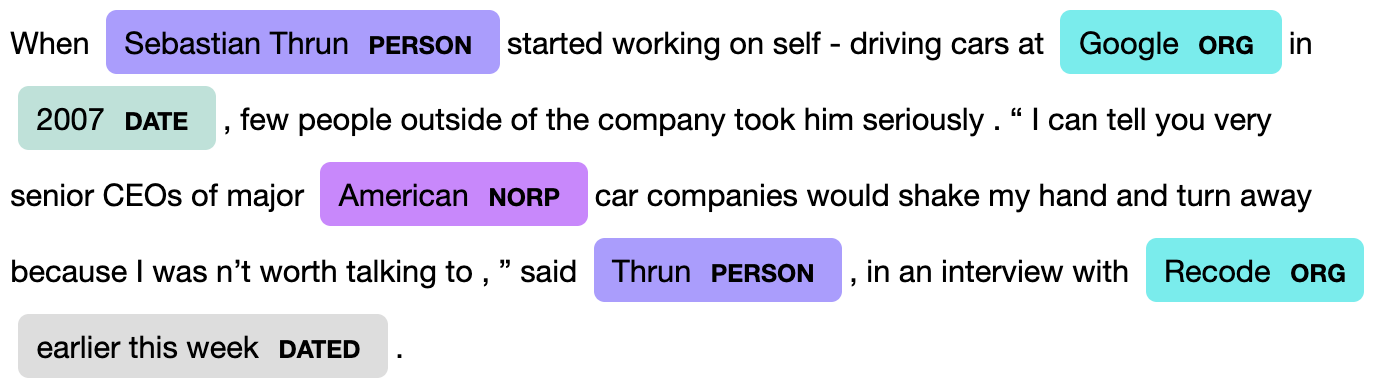

1. **Entity Classification**: NER identifies and categorizes entities like names, locations, and dates in text, helping to extract key information.

2. **Broad Applications**: It enhances tasks like information extraction, question answering, and summarization by highlighting important entities in the text.

In [55]:
nlp.get_pipe("ner").labels

text = """
Evans pointed to signs of the economy slowing down, including what he called the 'deteriorating' U.S. labor market. The U.S. Labor Department reported that the unemployment rate inched to 4.3% in July to its highest since October 2021, and a gauge for U.S. manufacturing activity fell to an eight-month low in the same month.
"""

doc = nlp(text=text)

displacy.render(doc, style='ent', jupyter=True)


In [63]:
table = PrettyTable()
table.field_names = ['token', 'label', 'explanation', 'Start Char', 'End Char']
for ent in doc.ents:
    table.add_row([ent.text, ent.label_, spacy.explain(ent.label_), ent.start_char, ent.end_char])

print(table)

+---------------------------+---------+-----------------------------------------+------------+----------+
|           token           |  label  |               explanation               | Start Char | End Char |
+---------------------------+---------+-----------------------------------------+------------+----------+
|           Evans           |  PERSON |       People, including fictional       |     1      |    6     |
|            U.S.           |   GPE   |        Countries, cities, states        |     98     |   102    |
| The U.S. Labor Department |   ORG   | Companies, agencies, institutions, etc. |    117     |   142    |
|            4.3%           | PERCENT |        Percentage, including "%"        |    189     |   193    |
|            July           |   DATE  |  Absolute or relative dates or periods  |    197     |   201    |
|        October 2021       |   DATE  |  Absolute or relative dates or periods  |    223     |   235    |
|            U.S.           |   GPE   |       

### 7. **Similarity**


1. **Measures Textual Relatedness**: Similarity in NLP quantifies how closely related two pieces of text are, based on factors like word choice, context, and meaning.

2. **Used in Various Applications**: It's crucial for tasks such as document clustering, recommendation systems, and paraphrase detection, where understanding the degree of similarity between texts is essential.

3. **Different Methods**: Similarity can be measured using various approaches, from simple techniques like cosine similarity on word vectors to more advanced methods involving contextual embeddings from models like BERT.

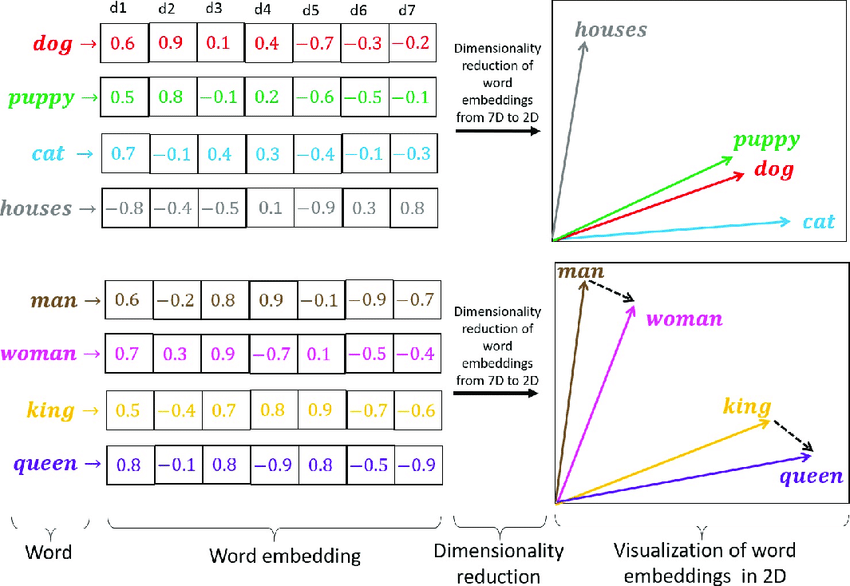

In [64]:
nlp = spacy.load('en_core_web_lg')

In [65]:
doc = nlp('cat')
vec1 = doc.vector
doc.vector.shape

In [69]:
doc = nlp('dog')
vec2 = doc.vector
doc.vector.shape

(300,)

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity([vec1], [vec2])
print(sim)

[[0.8220817]]


In [74]:
words = ['dog', 'cat', 'man', 'woman', 'king', 'queen', 'houses']


In [75]:
from itertools import combinations

In [86]:
table = PrettyTable(field_names=['word 1', 'word 2', 'score'])
for word1, word2 in combinations(words, 2):
    token1 = nlp(word1)
    token2 = nlp(word2)

    sim = token1.similarity(token2)
    table.add_row([word1, word2, f"{sim:.2f}"])

print(table)

+--------+--------+-------+
| word 1 | word 2 | score |
+--------+--------+-------+
|  dog   |  cat   |  0.82 |
|  dog   |  man   |  0.34 |
|  dog   | woman  |  0.31 |
|  dog   |  king  |  0.13 |
|  dog   | queen  |  0.17 |
|  dog   | houses |  0.09 |
|  cat   |  man   |  0.31 |
|  cat   | woman  |  0.32 |
|  cat   |  king  |  0.09 |
|  cat   | queen  |  0.25 |
|  cat   | houses |  0.06 |
|  man   | woman  |  0.83 |
|  man   |  king  |  0.42 |
|  man   | queen  |  0.35 |
|  man   | houses |  0.10 |
| woman  |  king  |  0.36 |
| woman  | queen  |  0.48 |
| woman  | houses |  0.11 |
|  king  | queen  |  0.61 |
|  king  | houses |  0.33 |
| queen  | houses |  0.14 |
+--------+--------+-------+
